In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
df = pd.read_excel("Municipal complaints.xlsx")

In [3]:
df.head(10)

,Category,Status,Media,Open Date,Closed Date,Age,Ward Office
0,Garbage,CLOSED,Swachhata App,01/01/2017,02/01/2017,31,Yerawda
1,Garbage,CLOSED,Swachhata App,01/01/2017,02/01/2017,31,Dhankawadi
2,Garbage,CLOSED,Swachhata App,01/01/2017,03/01/2017,59,Kasba
3,Garbage,CLOSED,Swachhata App,01/01/2017,02/01/2017,31,Yerawda
4,Garbage,CLOSED,Swachhata App,01/01/2017,03/01/2017,59,Kothrud
5,Garbage,CLOSED,Swachhata App,01/01/2017,02/01/2017,31,Warje
6,Garbage,CLOSED,Swachhata App,01/01/2017,02/01/2017,31,Shivajinagar
7,Drainage,CLOSED,Citizen,01/01/2017,2017-02-01 00:00:00,31,Nagar Road
8,Garbage,CLOSED,Swachhata App,01/01/2017,02/01/2017,31,Kothrud
9,Garbage,CLOSED,Swachhata App,01/01/2017,02/01/2017,31,Dhankawadi


In [4]:
df =df.drop(["Open Date"], axis=1)

In [5]:
df =df.drop(["Closed Date"], axis=1)

In [6]:
df.head(10)

,Category,Status,Media,Age,Ward Office
0,Garbage,CLOSED,Swachhata App,31,Yerawda
1,Garbage,CLOSED,Swachhata App,31,Dhankawadi
2,Garbage,CLOSED,Swachhata App,59,Kasba
3,Garbage,CLOSED,Swachhata App,31,Yerawda
4,Garbage,CLOSED,Swachhata App,59,Kothrud
5,Garbage,CLOSED,Swachhata App,31,Warje
6,Garbage,CLOSED,Swachhata App,31,Shivajinagar
7,Drainage,CLOSED,Citizen,31,Nagar Road
8,Garbage,CLOSED,Swachhata App,31,Kothrud
9,Garbage,CLOSED,Swachhata App,31,Dhankawadi


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     499 non-null    object
 1   Status       499 non-null    object
 2   Media        499 non-null    object
 3   Age          499 non-null    int64 
 4   Ward Office  499 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.6+ KB


In [8]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Category     499 non-null    int8 
 1   Status       499 non-null    int8 
 2   Media        499 non-null    int8 
 3   Age          499 non-null    int64
 4   Ward Office  499 non-null    int8 
dtypes: int64(1), int8(4)
memory usage: 6.0 KB


In [10]:
df.head(5)

,Category,Status,Media,Age,Ward Office
0,6,0,5,31,18
1,6,0,5,31,5
2,6,0,5,59,9
3,6,0,5,31,18
4,6,0,5,59,11


In [11]:
df.describe()

,Category,Status,Media,Age,Ward Office
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,6.014028,0.014028,4.753507,74.034068,9.266533
std,1.537289,0.160957,1.130697,56.387508,5.089865
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,5.000000,31.000000,5.000000
50%,6.000000,0.000000,5.000000,59.000000,9.000000
75%,6.000000,0.000000,5.000000,90.000000,13.000000
max,13.000000,2.000000,8.000000,485.000000,18.000000


ONE WAY ANOVA for Category column

In [12]:
formula = 'Age ~ C(Category)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq      mean_sq         F   PR(>F)
C(Category)   13.0  7.575463e+04  5827.279303  1.874579  0.03072
Residual     485.0  1.507662e+06  3108.581010       NaN      NaN


Drawing a Point plot for Category column

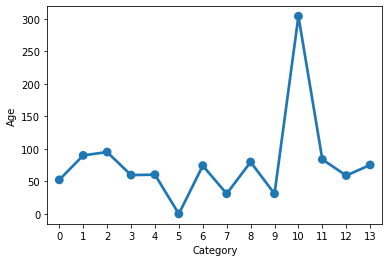

In [13]:
sns.pointplot(x='Category', y='Age', data=df, ci=None)

One WAY ANOVA for column Ward Office

In [16]:
formula = 'Age ~ C(Media)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq      mean_sq         F   PR(>F)
C(Media)    8.0  1.295379e+04  1619.223447  0.505214  0.85261
Residual  490.0  1.570463e+06  3205.025782       NaN      NaN


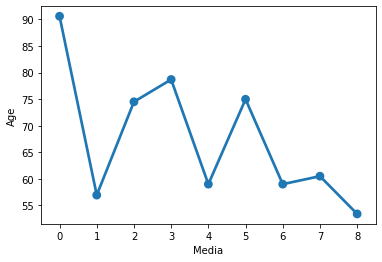

In [17]:
sns.pointplot(x='Media', y='Age', data=df, ci=None)

In [18]:
# Copy all the predictor variables into X dataframe
X = df.drop('Age', axis=1)

# Copy target into the y dataframe. 
y = df[['Age']]

In [19]:
X.head()

,Category,Status,Media,Ward Office
0,6,0,5,18
1,6,0,5,5
2,6,0,5,9
3,6,0,5,18
4,6,0,5,11


In [21]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [24]:
X['Category'] = std_scale.fit_transform(X[['Category']])

In [25]:
X['Status'] = std_scale.fit_transform(X[['Status']])

In [26]:
X['Media'] = std_scale.fit_transform(X[['Media']])

In [27]:
X['Ward Office'] = std_scale.fit_transform(X[['Ward Office']])

In [28]:
X.head()

,Category,Status,Media,Ward Office,Apps
0,-0.009134,-0.087241,0.21822,1.717576,-0.009134
1,-0.009134,-0.087241,0.21822,-0.839082,-0.009134
2,-0.009134,-0.087241,0.21822,-0.052418,-0.009134
3,-0.009134,-0.087241,0.21822,1.717576,-0.009134
4,-0.009134,-0.087241,0.21822,0.340914,-0.009134


In [30]:
y['Age'] = std_scale.fit_transform(y[['Age']])

<ipython-input-30-5d2d393c7dae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Age'] = std_scale.fit_transform(y[['Age']])


In [31]:
y.head()

,Age
0,-0.763950
1,-0.763950
2,-0.266888
3,-0.763950
4,-0.266888


In [32]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [34]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [35]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Category is 23055669678673.2
The coefficient for Status is -0.017179220190593418
The coefficient for Media is 0.016711788949380364
The coefficient for Ward Office is -0.04153775728009939
The coefficient for Apps is -23055669678673.14


In [37]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.02929040511782447


In [38]:
# R square on training data
regression_model.score(X_train, y_train)

0.0037303996320994237

In [39]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1.065421919627963

In [40]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.7635237237551484

Linear Regression using statsmodels

In [41]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Category,Status,Media,Ward Office,Apps,Age
495,-2.613729,-0.087241,-4.208268,0.930912,-2.613729,-0.266888
233,-0.009134,-0.087241,0.218220,0.340914,-0.009134,-0.763950
80,-0.009134,-0.087241,0.218220,-0.839082,-0.009134,-0.763950
46,-0.009134,-0.087241,0.218220,1.324244,-0.009134,-0.763950
142,-0.009134,-0.087241,0.218220,1.717576,-0.009134,-0.266888


In [42]:
expr= 'Age ~ Category + Status + Media'

In [43]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    0.030800
Category     0.057404
Status      -0.019565
Media        0.001147
dtype: float64

In [44]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2989
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.826
Time:                        13:16:33   Log-Likelihood:                -554.63
No. Observations:                 374   AIC:                             1117.
Df Residuals:                     370   BIC:                             1133.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0308      0.056      0.555      0.5

In [45]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('Age',axis=1))-data_train['Age'])**2)

In [46]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1.0661237670358916

In [47]:
np.sqrt(lm1.mse_resid) #another way

1.0718711066154656

In [48]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

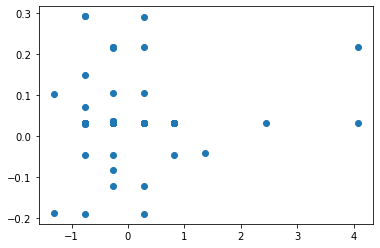

In [49]:
plt.scatter(y_test['Age'], y_pred)
plt.show()